In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2, min_l1
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *
from functools import partial
import random
import gc

In [2]:
m = 1000
d = 100
N = 10000
active = fourier

ratio_train = 0.7

def make_D(W, r=1):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**r)
    return D

In [3]:
qs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = fn6(X.T)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

seeds = [13, 14, 15]

results_l2 = []
results_wl2_1 = []
results_wl2_3 = []
results_wl2_5 = []
for q in qs:
    res_l2 = []
    res_wl2_1 = []
    res_wl2_3 = []
    res_wl2_5 = []
    for seed in seeds:
        random.seed(seed)
        np.random.seed(seed)

        W = make_W(d, q, N=N, dist=partial(normal, stdev=1))
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        
        D_1 = make_D(W, r=1)
        D_3 = make_D(W, r=3)
        D_5 = make_D(W, r=5)

        c_l2 = min_l2(A_train, y_train)
        c_wl2_1 = min_wl2(A_train, y_train, D_1)
        c_wl2_3 = min_wl2(A_train, y_train, D_3)
        c_wl2_5 = min_wl2(A_train, y_train, D_5)

        res_l2.append(np.linalg.norm(A_test@c_l2 - y_test) / np.linalg.norm(y_test))
        res_wl2_1.append(np.linalg.norm(A_test@c_wl2_1 - y_test) / np.linalg.norm(y_test))
        res_wl2_3.append(np.linalg.norm(A_test@c_wl2_3 - y_test) / np.linalg.norm(y_test))
        res_wl2_5.append(np.linalg.norm(A_test@c_wl2_5 - y_test) / np.linalg.norm(y_test))

        del W
        del D_1
        del D_3
        del D_5
        del A_train
        del A_test
        del c_l2
        del c_wl2_1
        del c_wl2_3
        del c_wl2_5

        gc.collect()

    results_l2.append(res_l2)
    results_wl2_1.append(res_wl2_1)
    results_wl2_3.append(res_wl2_3)
    results_wl2_5.append(res_wl2_5)

In [5]:
print([np.mean(res) for res in results_l2])
print([np.mean(res) for res in results_wl2_1])
print([np.mean(res) for res in results_wl2_3])
print([np.mean(res) for res in results_wl2_5])

[5.416720279612368, 1.0761410832201104, 1.0717763167949972, 1.0415332996508517, 1.012442058572976, 0.9937784432721002, 0.9886426207432351, 0.9891923444698355, 0.9926453717448434, 0.9952879070336206]
[5.523428295687704, 1.0189886950555094, 1.08306816530157, 1.0644993363105744, 1.0098114664474058, 1.004279893110794, 1.0045376400694757, 0.9996329832805637, 1.000584332008441, 1.0113501012492414]
[1.0376991735511532, 1.6824437516059645, 1.5849366984203719, 1.444363272688791, 1.3125794322129059, 1.2935764977002313, 1.2934316134660098, 1.2269137651854074, 1.2014046495120434, 1.2209743793540941]
[1.0238870254182595, 1.0748145527737558, 2.1563733946640777, 1.884423463807898, 1.6728645170694538, 1.6996170791766414, 1.5773057137633575, 1.5452092417755703, 1.4885870282280542, 1.5063707682941618]


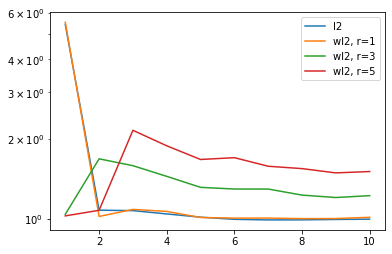

In [6]:
plt.semilogy(qs, [np.mean(res) for res in results_l2], label="l2")
plt.semilogy(qs, [np.mean(res) for res in results_wl2_1], label="wl2, r=1")
plt.semilogy(qs, [np.mean(res) for res in results_wl2_3], label="wl2, r=3")
plt.semilogy(qs, [np.mean(res) for res in results_wl2_5], label="wl2, r=5")
plt.legend()
plt.show()